Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.patheffects as path_effects

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

import cv2

import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

Load the training and testing dataset

In [2]:
dataset_path = 'dataset'
train = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_train.csv'))
test = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_test.csv'))
labels = train['label'].values # Extract labels

Remove the label column and binarize the labels

In [3]:
train.drop('label', axis = 1, inplace = True)
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

Convert the data into 2d np array because it's the format Tensorflow uses

In [4]:
images = train.values
images = np.array([np.reshape(i, (28, 28, 1)) for i in images])
# images = np.array([i.flatten() for i in images])

Split the data into test and train

In [5]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.3, random_state=420)

Define Hyperparameters

In [6]:
batch_size = 128
num_classes = 24
epochs = 10

Normalize the data to be between 0 and 1

In [7]:
x_train = x_train/255
x_test = x_test/255

Print a random image and its label

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


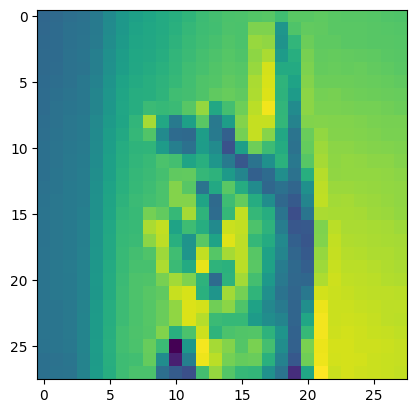

In [14]:
index = np.random.randint(0, len(images))
print(labels[index])
plt.imshow(images[index])